# Lab Part A

In [1]:
import math
import numpy as np
from matplotlib import pyplot

The objective is to create a hill using a superposition of uniform flow and source flow.
so we need to visualize the streamlines corresponding to a source and a uniform flow. To do that, we need to first define a set of points where the velocity components will be computed.

Let's define an evenly spaced Cartesian grid of points within a spatial domain that is 225 units of length wide in the $x$-direction and 62 units of length wide in the $y$-direction, i.e. $x,y\in\left[-25,200\right],\left[-2,60\right]$.

The variable `N` will be the number of points we want in each direction, and we define the computational boundaries by the variables `x_start`, `x_end`, `y_start` and `y_end`.

We use the NumPy function [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create two 1D arrays that contain the evenly spaced values of $x$ and $y$ coordinates, corresponding to our grid points. The last line of the code block below calls the [`meshgrid()`](http://docs.scipy.org/doc/numpy-1.4.x/reference/generated/numpy.meshgrid.html) function, which generates arrays containing the coordinates of points where the numerical solution will be calculated. Be sure to study the output of this function and understand what it does! We will use it throughout this course.

In [2]:
N = 400                               # Number of points in each direction
x_start, x_end = -50.0, 50.0            # x-direction boundaries
y_start, y_end = -2.0, 63.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # 1D-array for x
y = np.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

## uniform flow

The streamlines of a freestream with speed $U_\infty$(in our case $U_\infty = 20m/s$) and angle of attack $\alpha$ are given by:

$$\psi_\text{freestream}\left(x,y\right) = U_\infty \left(y\cos\alpha - x\sin\alpha\right)$$

Tthe streamlines are all straight, parallel lines that make an angle $\alpha$ with the $x$-axis. If the flow is completely horizontal, $\psi= U_\infty y$. Integrate, and you get that $u=U_\infty$ and $v=0$.
    
Let's write some code that will fill the arrays containing the $u$-velocity, the $v$-velocity and the stream function of a uniform horizontal flow $\left(U_\infty,\alpha=0\right)$, on every point of our grid. Note the handy NumPy functions [`ones()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), which creates a new array and fills it up with the value 1 everywhere, and `zeros()`, which creates an array filled with zeros.

In [3]:
u_inf = 20.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

## Source flow

Notice how we calculated all the values of `psi_freestream` in one fell swoop? No need for those cumbersome double loops—and it turns out, when the arrays are big, this is a lot faster to compute! Thank you `Numpy`!

From our previous *AeroPython* notebook, the stream function of a source flow located at $\left(x_\text{source},y_\text{source}\right)$ is:

$$\psi_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

and the velocity components are:

$$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

$$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

And remember that the stream function and velocity field of a source and a sink are exactly the same except one has positive strength while the other has negative strength. 

We can write functions that serve a double purpose: with $\sigma$ positive, they give the velocity and stream function of a source; with $\sigma$ negative, they give them for a sink. Aren't we clever?

Let's define a function called `get_velocity()` to compute the velocity components $(u,v)$ on a mesh (`X`,`Y`), given the `strength` of the singularity and its location (`xs`,`ys`). We define it with the `def` command, followed by our chosen name for the function, and any parameters inside the parenthesis. The line ends with a colon:

In [4]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

Note that the output of the function consists of two arrays: `u` and `v`. They are calculated inside the function, which is indicated by the indentation of the lines after the colon. The final line indicates with the `return` keyword that the arrays `u, v` are sent back to the statement that called the function.

Similarly, we define another function to compute the stream-function of the singularity (source or sink) on the mesh grid, and call it `get_stream_function()`.

In [5]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

now lets calculate the desired source strength:\
we want $\psi(0,40) = 0$ , as our source is located at the origin - 

$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y}{x}\right)$$

$$ \arctan \left(\frac{y}{x}\right) = \arctan \left(\frac{40}{0^+}\right) =  \arctan (\infty) = \frac{\pi}{2}$$

$$ 20\times 40 = \frac{\sigma}{2\pi}\times\frac{\pi}{2} =  \frac{\sigma}{4}$$

$$\sigma = 3200 \frac{m^2}{s} $$



In [6]:
strength_source = 20*40*4 # strength of the source
x_source, y_source = 0.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

# Superposition

Let's use superposition. The streamlines of the combination of a freestream and a source flow are:

$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

And since differentiation is linear, the velocity field induced by the new flow pattern is simply the sum of the freestream velocity field and the source velocity field:

$$u = u_\text{freestream} + u_\text{source}$$
$$v = v_\text{freestream} + v_\text{source}$$

The stagnation points in the flow are points where the velocity is zero (stagnant fluid, get it?). To find their location, we solve the following equations:

$$u = 0 , \quad v = 0$$

which leads to:

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty}$$

$$y_\text{stagnation} = y_\text{source}$$

The streamline containing the stagnation point is called the *dividing streamline*. It separates the fluid coming from the freestream and the fluid radiating from the source flow. On the streamline plot, we'll add a red curve to show the dividing streamline, and we'll use the [`contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) function for that. 

Pay careful attention to the detailed instructions we give our plotting library: we always want a *pretty* plot, so we specify color, linewidth, etc. You can learn about your options by looking at some [contour-plot demos](http://matplotlib.org/examples/pylab_examples/contour_demo.html).

We will also draw a green circle to show the location of the stagnation point, red one to show the source flow origin and black one to show the point $(0,40)$, using the [`scatter()`](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter) function.

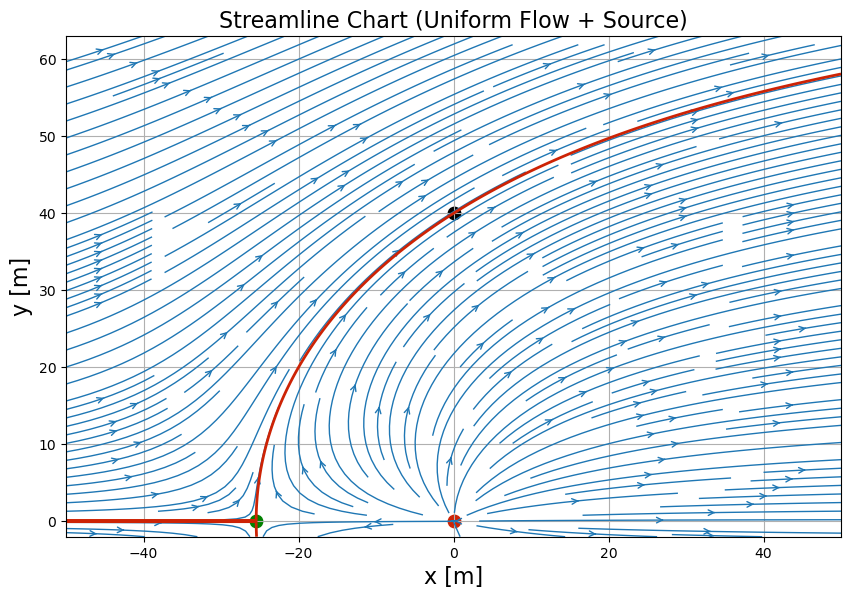

In [7]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.title("Streamline Chart (Uniform Flow + Source)" ,fontsize=16)
pyplot.grid(True)
pyplot.xlabel('x [m]', fontsize=16)
pyplot.ylabel('y [m]', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

pyplot.scatter(0,40,color='black',s=80)

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');

# velocity field

now lets create the velocity field using the formula:
$$ V = \sqrt {u^2+v^2}$$

(in order to see the difference in velocities, we must clip the extreme velocity values)

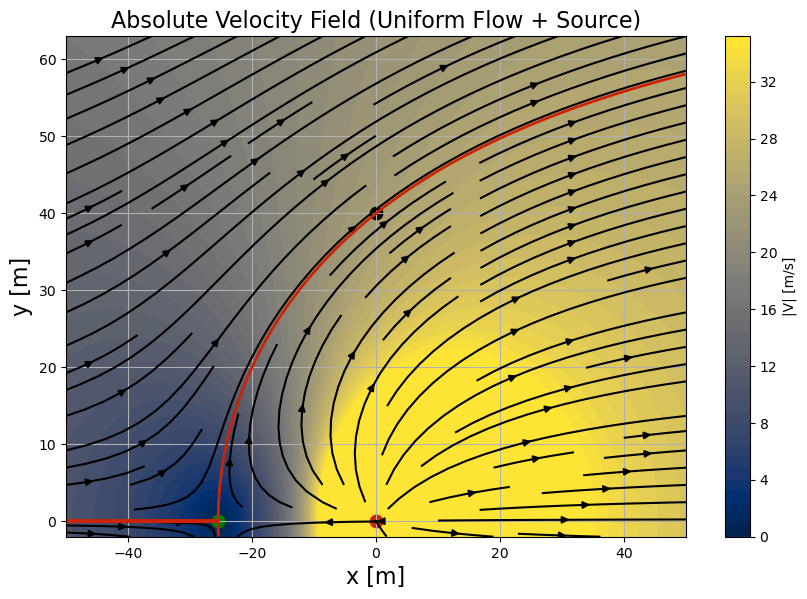

In [8]:
V = np.sqrt(u**2 + v**2)
V_abs_clipped = np.clip(V, 0, 35)

# plot the absolute velocity
pyplot.figure(figsize=(width, height))
contour = pyplot.contourf(X, Y, V_abs_clipped, levels=50, cmap='cividis')
pyplot.colorbar(contour, label='|V| [m/s]')
pyplot.streamplot(X, Y, u, v, color='k', density=1)
pyplot.title("Absolute Velocity Field (Uniform Flow + Source)",fontsize=16)
pyplot.xlabel("x [m]",fontsize=16)
pyplot.ylabel("y [m]",fontsize=16)
pyplot.axis([x_start, x_end, y_start, y_end])
pyplot.grid(True)
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

pyplot.scatter(0,40,color='black',s=80)

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');


# Pressure coefficient

now lets calculate the Pressure coefficient field using the formula:
$$C_p = 1 - \left( \frac{V}{U_\infty} \right)^2$$

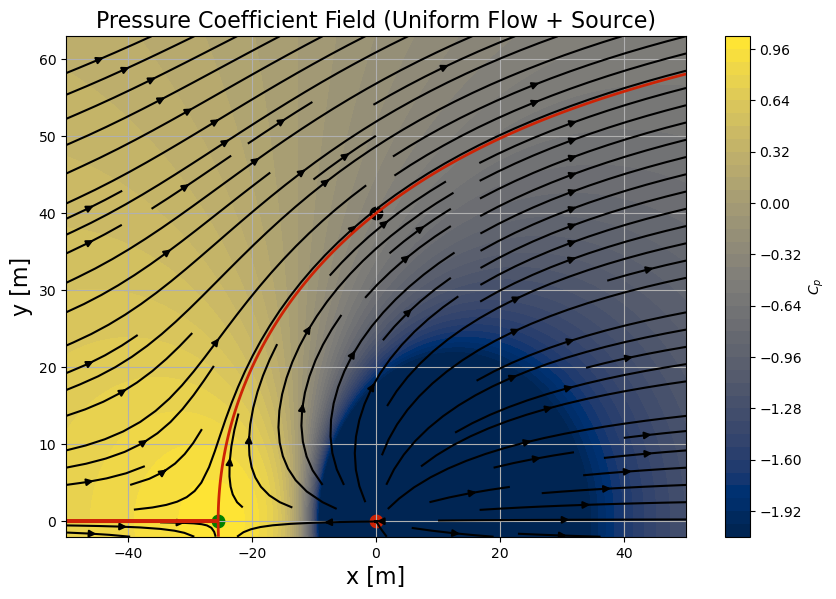

In [9]:
Cp = 1 - (V_abs_clipped / u_inf)**2

pyplot.figure(figsize=(width, height))
contour = pyplot.contourf(X, Y, Cp, levels=50, cmap='cividis')
pyplot.colorbar(contour, label=r"$C_p$")
pyplot.streamplot(X, Y, u, v, color='k', density=1)
pyplot.title("Pressure Coefficient Field (Uniform Flow + Source)",fontsize=16)
pyplot.xlabel("x [m]",fontsize=16)
pyplot.ylabel("y [m]",fontsize=16)
pyplot.axis([x_start, x_end, y_start, y_end])
pyplot.grid(True)
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

pyplot.scatter(0,40,color='black',s=80)

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');



# Comparing analytic solution to the numerical calculation

lets calculate the velocity at $(0,40)$:
$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y}{x}\right)$$

$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = U_\infty + \frac{\sigma}{2\pi}\frac{x}{x^2 + y^2} =20 + \frac{3200}{2\pi}\frac{0}{0^2 + 40^2} = 20 \frac{m}{s}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y}{x^2 + y^2} = \frac{3200}{2\pi}\frac{40}{0^2 + 40^2}=12.73 \frac{m}{s}$$

$$ V = \sqrt {u^2+v^2} = \sqrt {20^2 + 12.73^2} = 23.71\frac{m}{s}$$

In [10]:
i = np.argmin(np.abs(x - 0))
j = np.argmin(np.abs(y - 40))

# True velocity
V_true = V[j, i]

print(f"Velocity at (0,40): = {V_true:.3f} m/s")

Velocity at (0,40): = 23.737 m/s


# Pressure Coefficient and tangent speed on the hill shape line

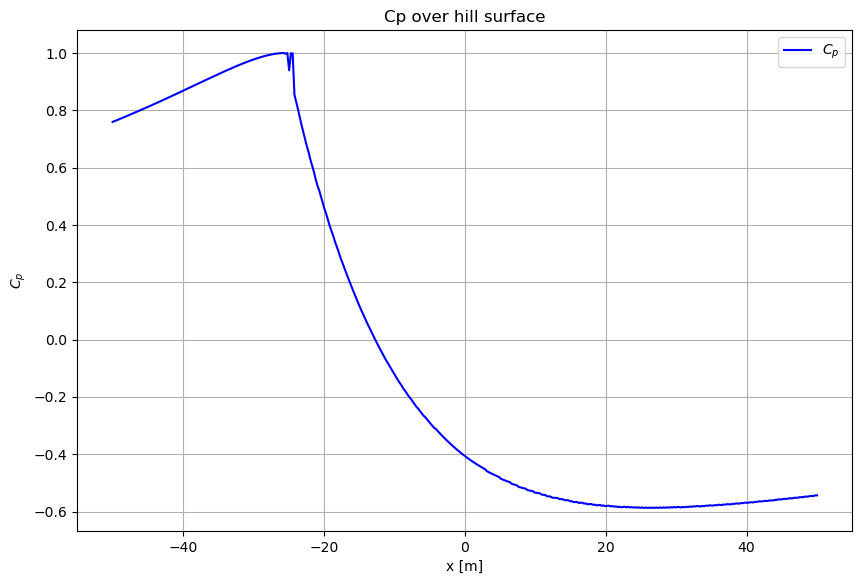

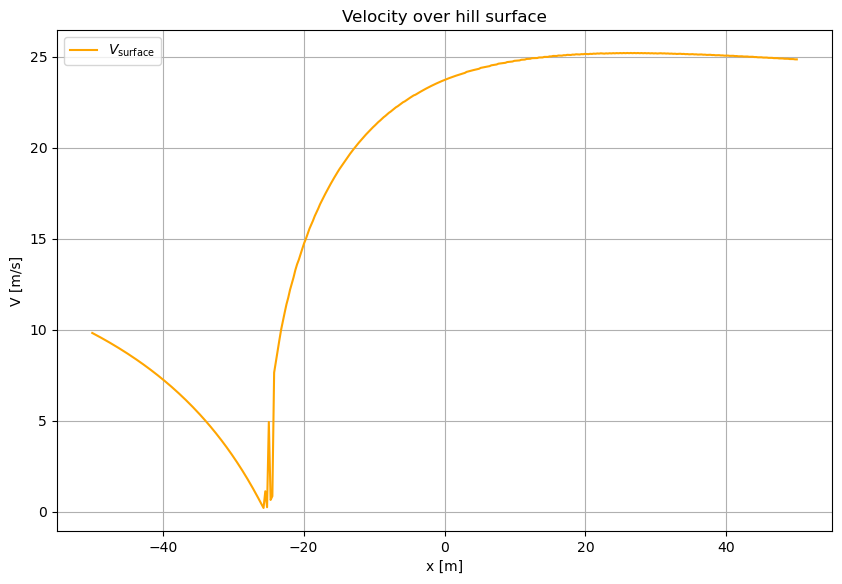

In [11]:
psi_surface = 1600

# Allocate arrays for output
y_hill = np.zeros_like(x)
Cp_surface = np.zeros_like(x)
V_surface = np.zeros_like(x)

# For each x column, find y where psi ≈ 1600
for i in range(len(x)):
    psi_col = psi[:, i]
    idx = np.argmin(np.abs(psi_col - psi_surface))  # closest y-index

    y_hill[i] = y[idx]
    Cp_surface[i] = Cp[idx, i]     # from precomputed Cp field
    V_surface[i] = V[idx, i]   # from velocity magnitude field

pyplot.figure(figsize=(width, height))
pyplot.plot(x, Cp_surface, label=r"$C_p$", color='blue')
pyplot.xlabel("x [m]")
pyplot.ylabel(r"$C_p$")
pyplot.title("Cp over hill surface")
pyplot.grid(True)
pyplot.legend()

# Plot V vs x along the hill
pyplot.figure(figsize=(width, height))
pyplot.plot(x, V_surface, label=r"$V_{\mathrm{surface}}$", color='orange')
pyplot.xlabel("x [m]")
pyplot.ylabel("V [m/s]")
pyplot.title("Velocity over hill surface")
pyplot.grid(True)
pyplot.legend()
